# 2.2 Weather RNN

## Contents
### 1. Import libraries and data sets
### 2. Reshape data sets
### 3. Split data
### 4. Create first Keras layered model (scenario 1)
### 5. Change hyperparameters - Final scenrio

## 1. Import libraries and data sets

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [45]:
path = r'/Users/susanwang/Documents/CF_ML/ML_Project'

In [46]:
weather_df = pd.read_csv(os.path.join(path, 'Data Sets', 'cleaned_weather.csv'), index_col=False)

In [47]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96


In [48]:
weather_df.shape

(22950, 135)

In [49]:
answers_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [50]:
answers_df.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# remove date column
answers_df.drop(columns=['DATE'], inplace=True)

In [52]:
answers_df.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
answers_df.shape

(22950, 15)

## 2. Reshape sets

Stations

In [54]:
stations = list()

columns = weather_df.columns.tolist()
for col in columns:
    name = col.split('_', 1)[0]
    if name not in stations:
        stations.append(name)

print(len(stations))
print(stations)

15
['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


Observation types

In [55]:
observations = list()

for col in columns:
    name = col.split('_', 1)[1]
    if name not in observations:
        observations.append(name)

print(len(observations))
print(observations)

9
['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


In [56]:
# Get X data set (weather_df) to shape of (22950, 15, 9)
# how do I ensure that the reshaping of the arrays correspond correctly to the 15 stations and 9 observations?

In [57]:
weather_arr = np.array(weather_df)
weather_arr

array([[7.    , 0.85  , 1.018 , ..., 8.    , 1.0304, 0.98  ],
       [6.    , 0.84  , 1.018 , ..., 6.    , 1.0292, 0.62  ],
       [8.    , 0.9   , 1.018 , ..., 8.    , 1.032 , 0.69  ],
       ...,
       [4.    , 0.76  , 1.0227, ..., 3.    , 1.0263, 0.85  ],
       [5.    , 0.8   , 1.0212, ..., 3.    , 1.0263, 0.94  ],
       [5.    , 0.84  , 1.0193, ..., 3.    , 1.0263, 0.97  ]])

In [58]:
weather_arr.shape

(22950, 135)

In [59]:
X = weather_arr.reshape(-1, 15, 9)
X

array([[[ 7.0000e+00,  8.5000e-01,  1.0180e+00, ...,  6.5000e+00,
          8.0000e-01,  1.0900e+01],
        [ 1.0000e+00,  8.1000e-01,  1.0195e+00, ...,  3.7000e+00,
         -9.0000e-01,  7.9000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.4000e+00,
         -4.0000e-01,  5.1000e+00],
        ...,
        [ 1.0304e+00,  4.8000e-01,  1.0000e-02, ..., -3.2000e+00,
          5.0000e+00,  1.0114e+00],
        [ 5.0000e-02,  3.2000e-01,  0.0000e+00, ...,  5.0000e+00,
          8.8000e-01,  1.0003e+00],
        [ 4.5000e-01,  3.4000e-01,  4.7000e+00, ...,  8.0000e+00,
          1.0304e+00,  9.8000e-01]],

       [[ 6.0000e+00,  8.4000e-01,  1.0180e+00, ...,  6.1000e+00,
          3.3000e+00,  1.0100e+01],
        [ 6.0000e+00,  8.4000e-01,  1.0172e+00, ...,  2.9000e+00,
          2.2000e+00,  4.4000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.3000e+00,
          1.4000e+00,  3.1000e+00],
        ...,
        [ 1.0292e+00,  2.1000e-01,  6.1000e-01, ..., -

In [60]:
X.shape

(22950, 15, 9)

In [61]:
y = np.array(answers_df)
y.shape

(22950, 15)

## 3. Split data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15, 9)
(5738, 15, 9)
(17212, 15)
(5738, 15)


## 4. Create first Keras layered model

### Scenario 1

In [64]:
len(X_train[0])

15

In [65]:
len(X_train[0][0])

9

In [66]:
len(y_train[0])

15

In [67]:
epochs = 30
batch_size = 16
n_hidden = 8

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

# model = Sequential()
# model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# model.add(Dropout(0.5))
# model.add(Dense(n_classes, activation='sigmoid'))
# produces userwarning - new keras update recommends using Input in the first layer of the model

model = Sequential([
    Input(shape=(timesteps, input_dim)),   # 👈 new Input layer
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='sigmoid')  # or 'softmax' depending on your task
])

In [68]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [69]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1446 - loss: 9.2780 - val_accuracy: 0.1649 - val_loss: 8.3547
Epoch 2/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1229 - loss: 9.2910 - val_accuracy: 0.0401 - val_loss: 8.3156
Epoch 3/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2097 - loss: 9.2782 - val_accuracy: 0.2604 - val_loss: 8.4466
Epoch 4/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2477 - loss: 9.3290 - val_accuracy: 0.2496 - val_loss: 8.6265
Epoch 5/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2637 - loss: 9.4265 - val_accuracy: 0.2585 - val_loss: 8.7675
Epoch 6/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2650 - loss: 9.5272 - val_accuracy: 0.2670 - val_loss: 8.8918
Epoch 7/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2683 - loss: 9.6037 - val_accuracy: 0.2579 - val_loss: 9.0658
Epoch 8/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2721 - loss: 9.7012 - 

### Confusion Matrix - scenario 1

In [70]:
locations = list({x.split("_")[0] for x in weather_df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [71]:
# define y_pred
y_pred = pd.DataFrame(model.predict(X_test))
y_pred = y_pred.astype('int32')
y_pred

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5735,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0
5734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5735,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
5736,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


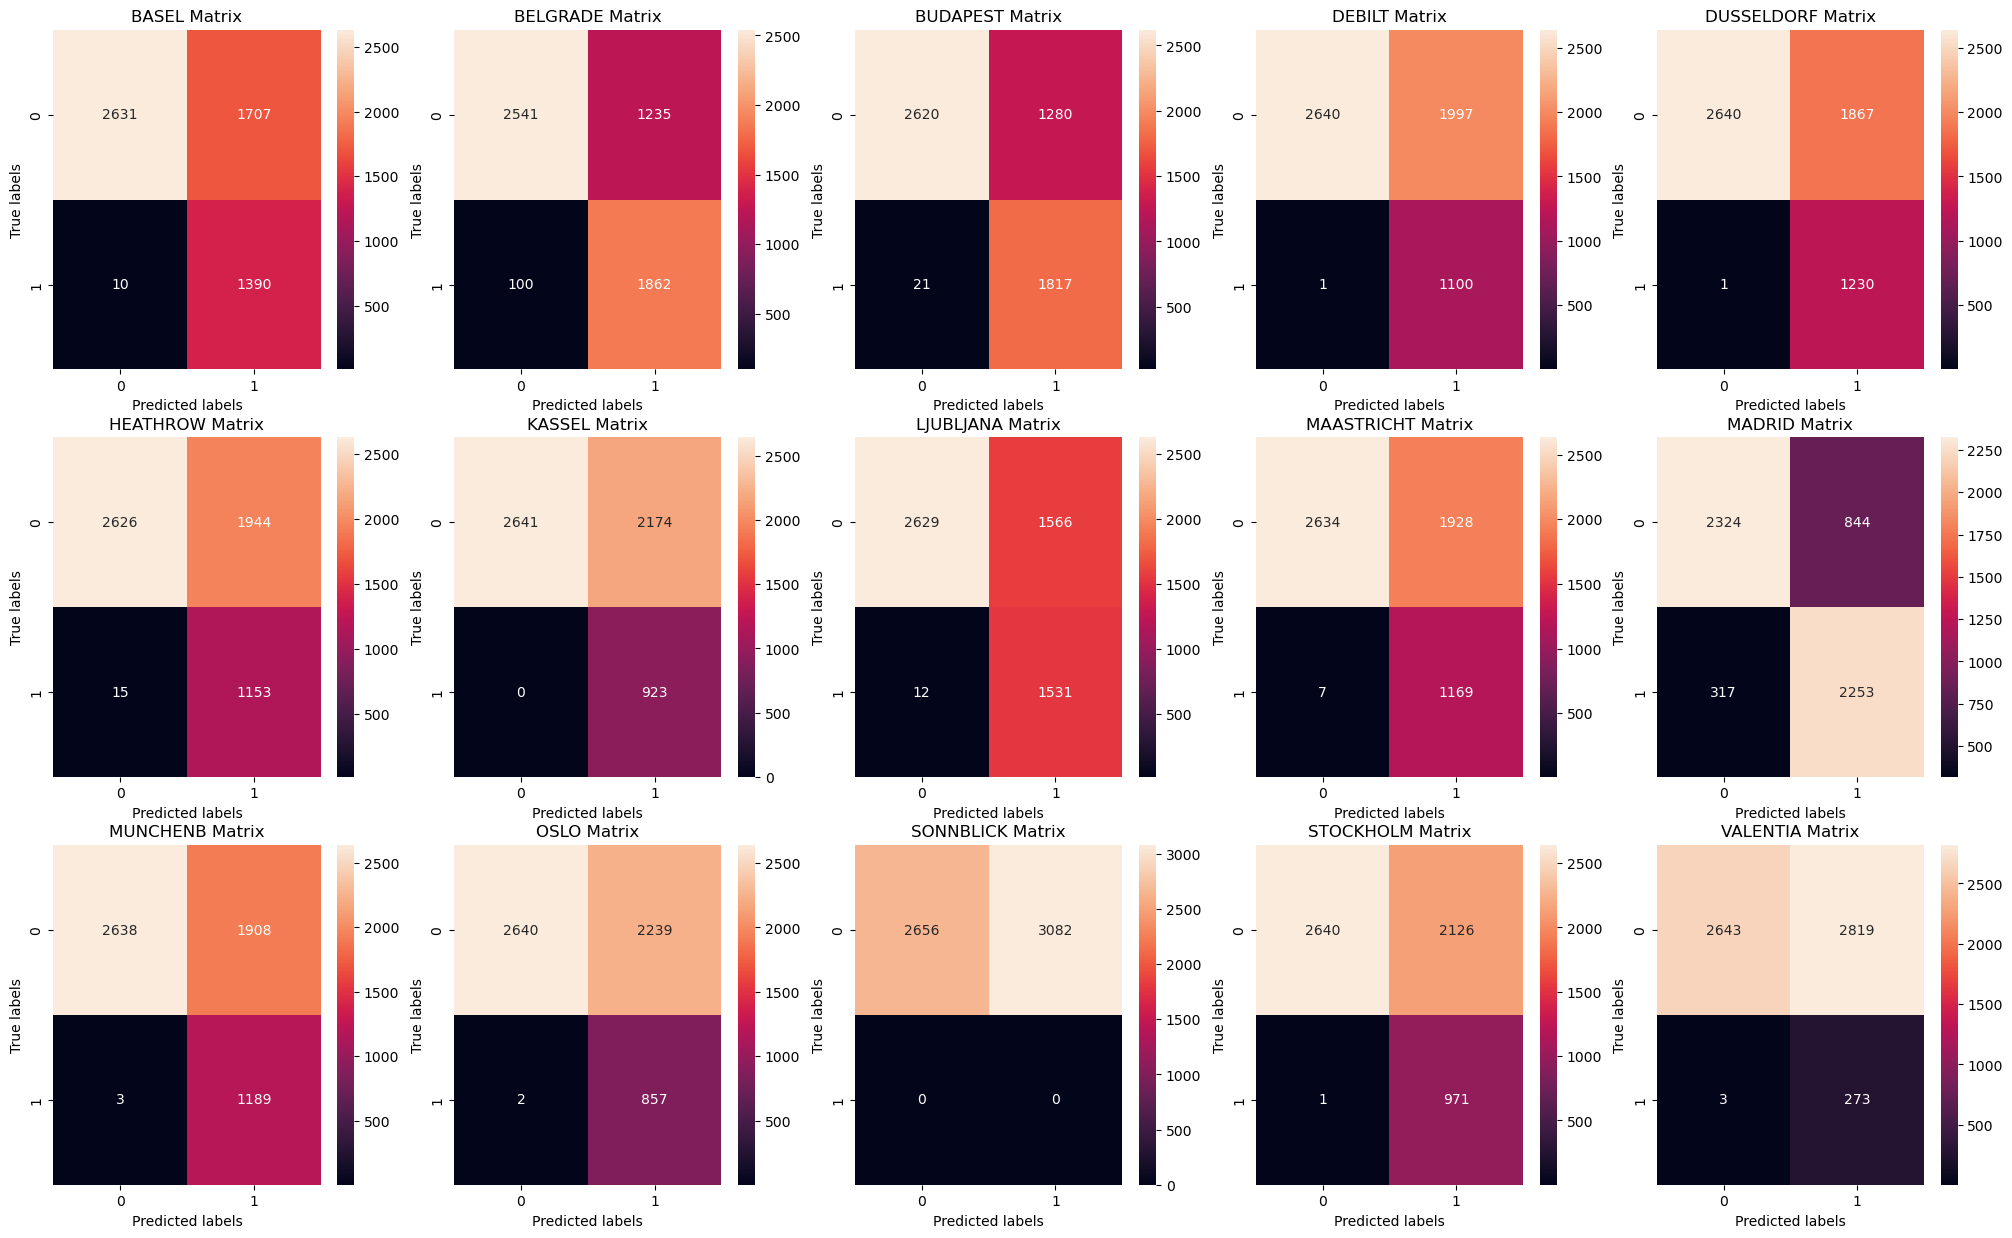

In [73]:
# key = "_pleasant_weather"
# stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
# labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        # cm = confusion_matrix(y_test_df.loc[:,name+key], y_pred[:,count])
        cm = confusion_matrix(y_test_df.loc[:, count], y_pred.loc[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## 5. Changing hyperparameters

### Use below cells to experiment with hyperparameters until arriving at optimal results

In [89]:
epochs = 10
batch_size =16
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential([
    Input(shape=(timesteps, input_dim)),  
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='sigmoid') ])

In [90]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [91]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1684 - loss: 11.0949 - val_accuracy: 0.2673 - val_loss: 9.2127
Epoch 2/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2688 - loss: 10.8820 - val_accuracy: 0.2693 - val_loss: 9.0512
Epoch 3/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2882 - loss: 10.6370 - val_accuracy: 0.2665 - val_loss: 9.0877
Epoch 4/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4767 - loss: 10.5410 - val_accuracy: 0.6399 - val_loss: 9.2288
Epoch 5/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6060 - loss: 10.5962 - val_accuracy: 0.6420 - val_loss: 9.3864
Epoch 6/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6376 - loss: 10.6009 - val_accuracy: 0.6422 - val_loss: 9.6350
Epoch 7/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6428 - loss: 10.6929 - val_accuracy: 0.6410 - val_loss: 9.7340
Epoch 8/10
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6436 - loss: 10

### Confusion Matrix - final scenario

In [92]:
y_pred = pd.DataFrame(model.predict(X_test))
y_pred = y_pred.astype('int32')
y_pred

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5735,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


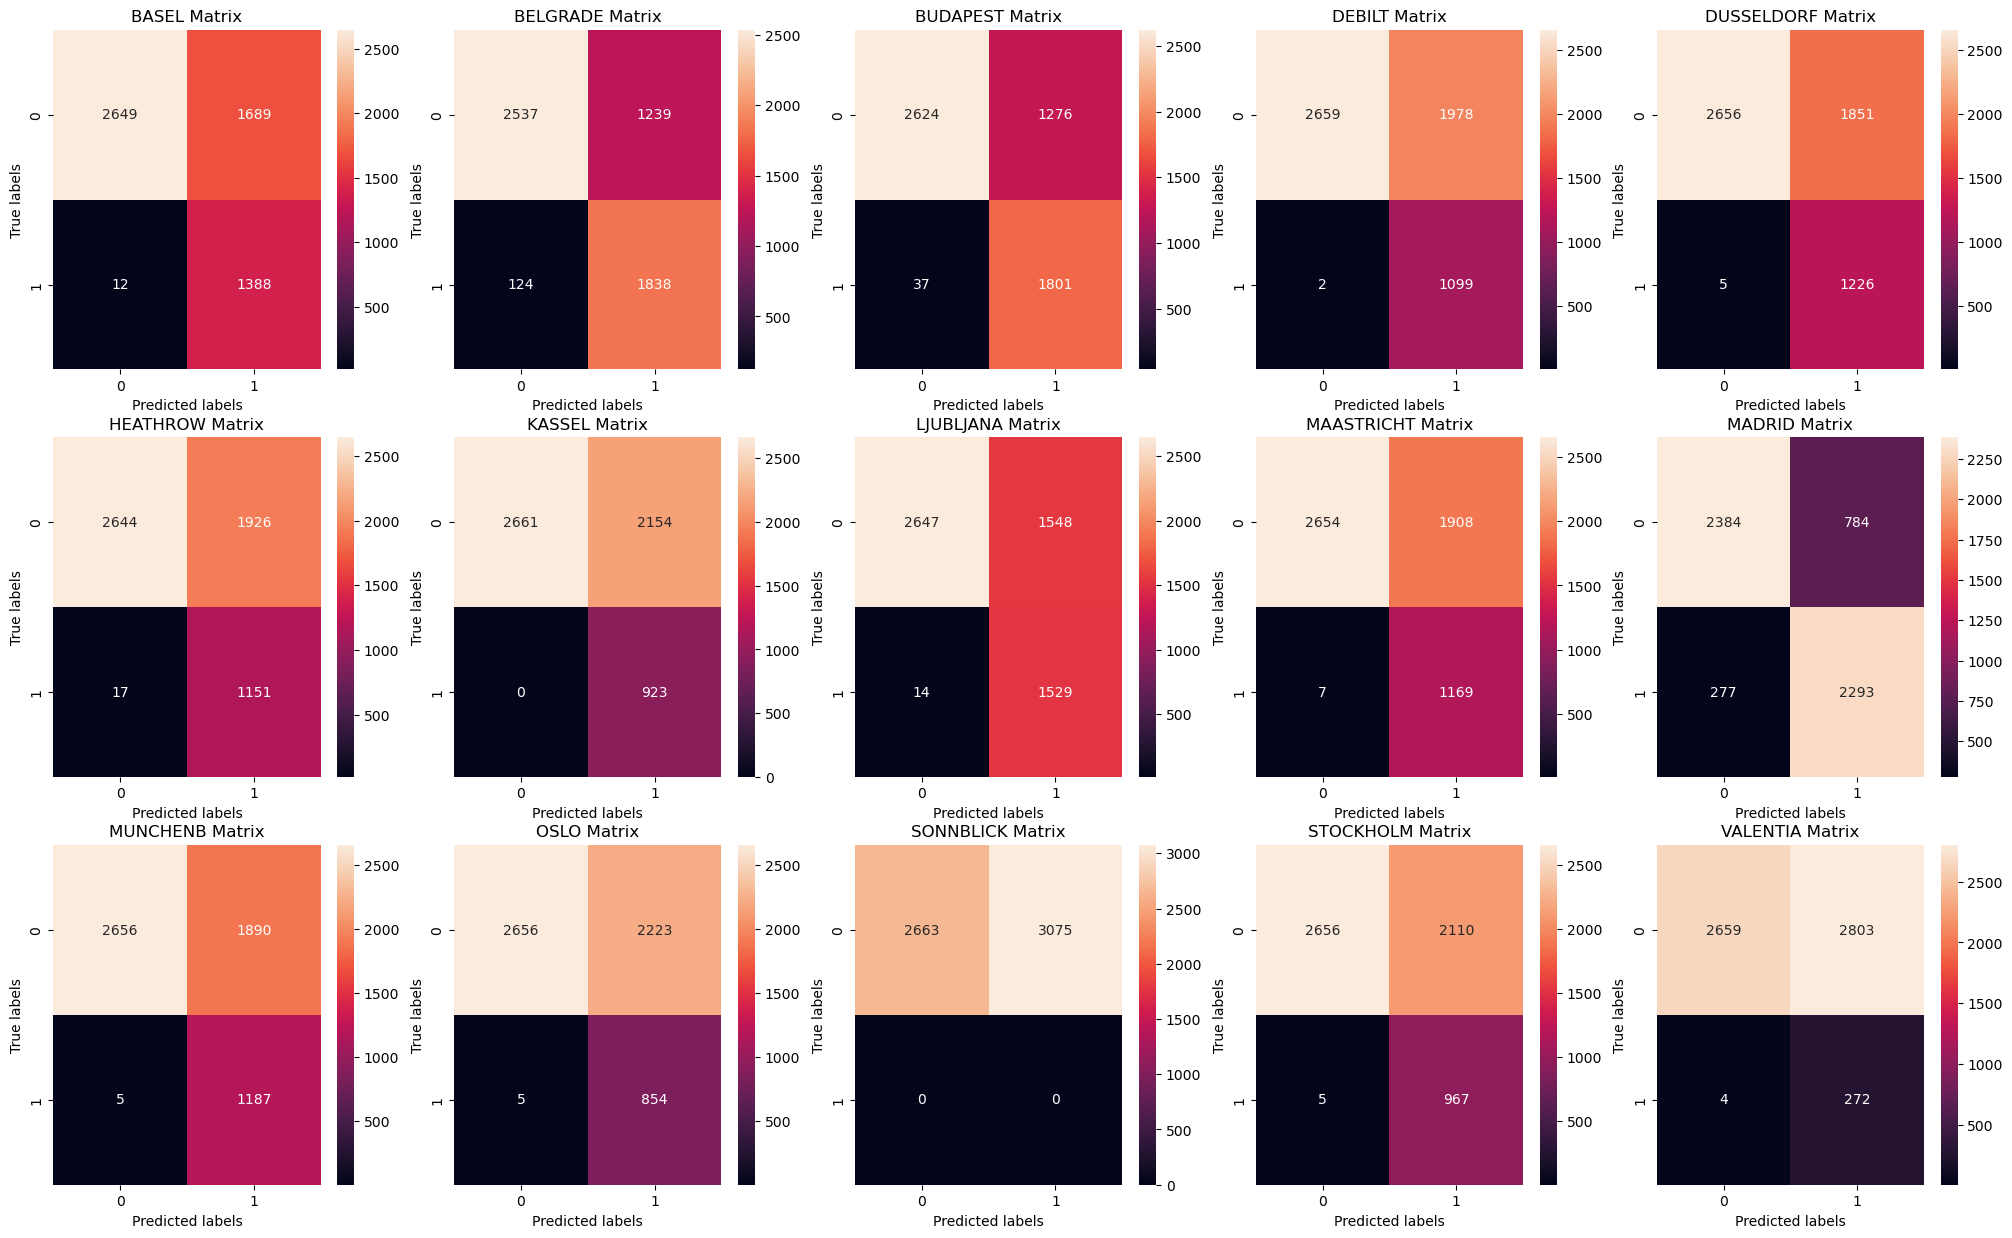

In [93]:
# key = "_pleasant_weather"
# stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
# labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        # cm = confusion_matrix(y_test_df.loc[:,name+key], y_pred[:,count])
        cm = confusion_matrix(y_test_df.loc[:, count], y_pred.loc[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1